In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 41.6 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-08-03 01:04:31--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt
import io

df=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)

df.head(10)

,Unnamed: 0,Place,Address,Name,Review,Date,Score
0,0,전주 한옥 마을,-,diditall,전주가면 무조건 가봐야하는곳한옥하나하나 너무 멋지고 잘 꾸며져 있어요그러나 길거리 ...,2021년 5월 25일,4.0
1,1,전주 한옥 마을,-,hyun,"젊음의 거리, 사진찍는 거리입니다. 저렴하게 빌리는 옷 덕분에 여기 저기 한복 입고...",2021년 5월 6일,4.0
2,2,전주 한옥 마을,-,l*alalala,한복입고 사진찍긴 좋아요거리음식거리라서 먼가 특별하다 싶지 않아요물론 처음가서 보기...,2021년 5월 4일,3.0
3,3,전주 한옥 마을,-,ashurei2000,전주여행을 생각한다면 꼭 한번 가게되는 곳이라고 생각합니다.한옥을 보는 재미도 있지...,2020년 9월 18일,4.0
4,4,전주 한옥 마을,-,blessmj,첫째날은 사람구경둘째날은 먹거리 먹고 꽃구경 셋째날은 세세한 곳 소리관 김치 그...,2020년 5월 28일,5.0
5,5,전주 한옥 마을,-,사장님,전주 한옥마을을 평일에 갔더니 한산하니 좋았어요.길에 쓰레기 하나 없이 너무 깨끗했...,2020년 2월 4일,3.0
6,6,전주 한옥 마을,-,composuretour,명절 긴 이동거리를 고려하여 중간 휴식지로 전주 한옥마을을 선택명절 직전 한옥 마을...,2020년 1월 29일,3.0
7,7,전주 한옥 마을,-,Oh!,한옥마을 거리가 온통 가게들로 바뀌었네요. 사람이 북적거리는 건 좋은데 고즈넉한 맛...,2020년 1월 14일,3.0
8,8,전주 한옥 마을,-,panclass,"오랜만에 가봤는 데, 깨끗하게 관리 되고 있는 듯 보였고, 이쁜 한복체험하는 곳도 ...",2020년 1월 2일,5.0
9,9,전주 한옥 마을,-,ahirity,전주에 내려간 여행객들이 모두 모이는 곳이다. 먹자거리가 형성되어 있어서 길을 걷다...,2019년 12월 9일,4.0


In [ ]:
cdf=df[['Review']]
print(type(cdf))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
drop_index = cdf[cdf['Review'] == '-'].index
cdf=cdf.drop(drop_index)
cdf.head()

,Review
0,전주가면 무조건 가봐야하는곳한옥하나하나 너무 멋지고 잘 꾸며져 있어요그러나 길거리 ...
1,"젊음의 거리, 사진찍는 거리입니다. 저렴하게 빌리는 옷 덕분에 여기 저기 한복 입고..."
2,한복입고 사진찍긴 좋아요거리음식거리라서 먼가 특별하다 싶지 않아요물론 처음가서 보기...
3,전주여행을 생각한다면 꼭 한번 가게되는 곳이라고 생각합니다.한옥을 보는 재미도 있지...
4,첫째날은 사람구경둘째날은 먹거리 먹고 꽃구경 셋째날은 세세한 곳 소리관 김치 그...


In [ ]:
cdf_l=list(np.array(cdf.Review.tolist()))

In [ ]:
print(cdf_l[0])

전주가면 무조건 가봐야하는곳한옥하나하나 너무 멋지고 잘 꾸며져 있어요그러나 길거리 음식들이 너무 난잡하게 되어있어요간단하게 둘러보시고 사진찍기 좋아요


In [ ]:
import re
clean_text = []

for n in range(len(cdf_l)):
    
    try:
      line = cdf_l[n]
      l = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글을 뺀 나머지 l에 저장
      text = l.sub("",line) # l을 line에서 지움
      clean_text.append(text)
    except : pass
  
print(clean_text)

['전주가면 무조건 가봐야하는곳한옥하나하나 너무 멋지고 잘 꾸며져 있어요그러나 길거리 음식들이 너무 난잡하게 되어있어요간단하게 둘러보시고 사진찍기 좋아요', '젊음의 거리 사진찍는 거리입니다 저렴하게 빌리는 옷 덕분에 여기 저기 한복 입고 다니며 사진 찍는 사람들이 많읍니다 옷도 예쁘고 머리 장식까지 예쁘게 잘 해주는데 한 번쯤 해볼만 합니다 나이 드신 분들도 여고 동창들 끼리 모녀들도 와서 하느데 보기 좋더라구요  길거리 음식도 저렴하고 맛있읍니다', '한복입고 사진찍긴 좋아요거리음식거리라서 먼가 특별하다 싶지 않아요물론 처음가서 보기에는 좋고 골목골목돌아다니면    길이나 돌담이나 예쁘긴 해요하지만 거리음식거리같아요 어느순간 한옥마을은 사라지고 음식점만 남았엉ㄷ', '전주여행을 생각한다면 꼭 한번 가게되는 곳이라고 생각합니다한옥을 보는 재미도 있지만길거리 여러가지 음식들도 여행의 즐거움을 더해줍니다특히나 육전과 문어꼬치가 맛있었어요그리고 한국 전통의 얼레빗을 파는 매장을 발견했는데 무형문화재 이상근목소장님이하나 하나 만드시는 것으로 너무 아름답고 좋았습니다전주 마을을 가신다면 방문해보시고 선물용으로 장만하셔도 좋을거 같아요저도 가격이 좀 비쌌지만 마음에 드는 얼레빗을 장만했지요', '첫째날은 사람구경둘째날은 먹거리 먹고 꽃구경 셋째날은 세세한 곳 소리관 김치   그릇구경등  볼거리가 소소하게 많아 좋았어요', '전주 한옥마을을 평일에 갔더니 한산하니 좋았어요길에 쓰레기 하나 없이 너무 깨끗했고 주차장도 잘 되어 있어서 구경하기에 좋았답니다요즘엔 한복뿐만 아니라 경성의복 대여점도 있어 경성의복 대여해서 입고 다니는 분들도 많아서 잼있었어요', '명절 긴 이동거리를 고려하여 중간 휴식지로 전주 한옥마을을 선택명절 직전 한옥 마을 그리고 한옥 펜션을 구경하니 더욱 명절 스럽고나름 의미있는 기분 전환의 시간을 보낼 수 있음', '한옥마을 거리가 온통 가게들로 바뀌었네요 사람이 북적거리는 건 좋은데 고즈넉한 맛은 사라져서 아쉽기만 하네요 정체불명의 한복들도 많이 보

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-g02f3njz
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-g02f3njz
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4870 sha256=07747eb840b41b57863780194d330fcc2e08437cd8f1387229e0570b1ad16bfd
  Stored in directory: /tmp/pip-ephem-wheel-cache-zoewzro8/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)
hanspell_sent = spelled_sent.checked


print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [ ]:
hansp=[]
for i in clean_text:
  print(i)
  sent = i
  spelled_sent = spell_checker.check(sent)
  hanspell_sent = spelled_sent.checked
  hansp.append(hanspell_sent)

print(hansp)

전주가면 무조건 가봐야하는곳한옥하나하나 너무 멋지고 잘 꾸며져 있어요그러나 길거리 음식들이 너무 난잡하게 되어있어요간단하게 둘러보시고 사진찍기 좋아요
젊음의 거리 사진찍는 거리입니다 저렴하게 빌리는 옷 덕분에 여기 저기 한복 입고 다니며 사진 찍는 사람들이 많읍니다 옷도 예쁘고 머리 장식까지 예쁘게 잘 해주는데 한 번쯤 해볼만 합니다 나이 드신 분들도 여고 동창들 끼리 모녀들도 와서 하느데 보기 좋더라구요  길거리 음식도 저렴하고 맛있읍니다
한복입고 사진찍긴 좋아요거리음식거리라서 먼가 특별하다 싶지 않아요물론 처음가서 보기에는 좋고 골목골목돌아다니면    길이나 돌담이나 예쁘긴 해요하지만 거리음식거리같아요 어느순간 한옥마을은 사라지고 음식점만 남았엉ㄷ
전주여행을 생각한다면 꼭 한번 가게되는 곳이라고 생각합니다한옥을 보는 재미도 있지만길거리 여러가지 음식들도 여행의 즐거움을 더해줍니다특히나 육전과 문어꼬치가 맛있었어요그리고 한국 전통의 얼레빗을 파는 매장을 발견했는데 무형문화재 이상근목소장님이하나 하나 만드시는 것으로 너무 아름답고 좋았습니다전주 마을을 가신다면 방문해보시고 선물용으로 장만하셔도 좋을거 같아요저도 가격이 좀 비쌌지만 마음에 드는 얼레빗을 장만했지요
첫째날은 사람구경둘째날은 먹거리 먹고 꽃구경 셋째날은 세세한 곳 소리관 김치   그릇구경등  볼거리가 소소하게 많아 좋았어요
전주 한옥마을을 평일에 갔더니 한산하니 좋았어요길에 쓰레기 하나 없이 너무 깨끗했고 주차장도 잘 되어 있어서 구경하기에 좋았답니다요즘엔 한복뿐만 아니라 경성의복 대여점도 있어 경성의복 대여해서 입고 다니는 분들도 많아서 잼있었어요
명절 긴 이동거리를 고려하여 중간 휴식지로 전주 한옥마을을 선택명절 직전 한옥 마을 그리고 한옥 펜션을 구경하니 더욱 명절 스럽고나름 의미있는 기분 전환의 시간을 보낼 수 있음
한옥마을 거리가 온통 가게들로 바뀌었네요 사람이 북적거리는 건 좋은데 고즈넉한 맛은 사라져서 아쉽기만 하네요 정체불명의 한복들도 많이 보이구요
오랜만에 가봤는 데 깨끗하게 관리 

In [ ]:
!pip install soynlp

     |████████████████████████████████| 416 kB 2.3 MB/s 


In [ ]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7fe8172deb50>)

In [ ]:
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [ ]:
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 10:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

In [ ]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.447 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


In [ ]:
from soynlp.tokenizer import MaxScoreTokenizer
scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

In [ ]:
Soynlp=[]
for i in hansp:
  maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
  m = maxscore_tokenizer.tokenize(i)
  Soynlp.append(m)

print(Soynlp)

[['전주', '가면', '무조건', '가', '봐야', '하는', '곳', '한옥', '하나하나', '너무', '멋지', '고', '잘', '꾸며져', '있어요', '그러나', '길거리', '음식', '들이', '너무', '난잡하게', '되어', '있어요', '간단하게', '둘러', '보시고', '사진', '찍기', '좋아', '요'], ['젊음의', '거리', '사진', '찍는', '거리', '입니다', '저렴하게', '빌리는', '옷', '덕분에', '여기저기', '한복', '입고', '다니며', '사진', '찍는', '사람들이', '많습니다', '옷도', '예쁘고', '머리', '장식', '까지', '예쁘게', '잘', '해주는', '데', '한', '번쯤', '해볼', '만', '합니다', '나이', '드신', '분들도', '여고', '동창들끼리', '모녀들도', '와서', '하는', '데', '보기', '좋더', '라고', '요', '길거리', '음식', '도', '저렴', '하고', '맛', '있습니다'], ['한복', '입고', '사진', '찍긴', '좋아', '요', '거리', '음식', '거리', '라서', '먼가', '특별', '하다', '싶지', '않아', '요', '물론', '처음', '가서', '보기에는', '좋고', '골목골목', '돌아', '다니면', '길이', '나', '돌담이나', '예쁘긴', '해요', '하지만', '거리', '음식', '거리', '같아요', '어느', '순간', '한옥마을', '은', '사라지고', '음식', '점만', '남았어ᄃ'], ['전주', '여행을', '생각한다', '면', '꼭', '한번', '가게', '되는', '곳이', '라고', '생각', '합니다', '한옥을', '보는', '재미도', '있지만', '길거리', '여러', '가지', '음식', '들도', '여행', '의', '즐거움을', '더해', '줍니다', '특히', '나', '육전과', '문어', '꼬치가', '맛있', '었어요', '그리

In [ ]:
df1=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)
df2=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)
df3=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)
df4=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)

In [ ]:
cdf1=df1[['Review', 'Score']]
pd.to_numeric(cdf1.Score)
cdf1.head()

,Review,Score
0,#스타벅스,5.0
1,#스타벅스 #스타벅스디티,5.0
2,좋아요,5.0
3,굿,4.0
4,굿,5.0


In [ ]:
cdf2=df2[['Review', 'Score']]
cdf2.Score=pd.to_numeric(cdf2.Score, errors='coerce')
cdf2=cdf2.dropna()
#cdf2.head()
cdf2[310:320]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Review,Score
310,"각 지역마다 세워진 조선이 교육기관입니다. 전주 향교는 앞에 대성전, 뒤에 명륜당이...",4.0
311,조선시대 양반 자제들이 공부하는 곳이 향교라고 하죠. 전주향교 역시 그런 곳입니다....,3.0
312,활기찬 현재의 한옥마을에서 잠시나마 조선시대의 여유를 즐길 수 있는 곳...향교는 ...,4.0
313,사람들이 많지 않아서 조용히 둘러보고 오기 좋았습니다. 봄이 시작되어 잔디와 나무에...,4.0
314,한옥마을 끝자라에 있고 맞은편에는 국립무형문화원이 있다. 작은 성균관이라 볼 수 있...,4.0
315,한옥 마을 안에 위치해요~ 조선시대 교육을 담당했던 곳이죠~ ~~가을에 가면 아름다...,4.0
316,한옥마을 안에 위치해 있어요여기서 드라마나 영화 촬영도 많이 한거 같아요깨끗하게 관...,4.0
317,향교는 노오란 옷을 입고 맞이해줍니다.오래된 나무로 인해 사극 드라마에도 많이 나와...,4.0
319,불과 몇년전 전주를 왔을때 들렸던 막걸리골목보다 조금은 활기차지긴 했지만 그때 느꼈...,3.0
320,막걸리를 한병 시키면 다양한 안주가 따라 나오던예전의 매력은 떨어지지만가족여행객들이...,4.0


In [ ]:
cdf4=df4[['Review', 'Score']]
cdf4.head()
pd.to_numeric(cdf4.Score)
print(type(cdf4.Score[10]))

<class 'numpy.int64'>


In [ ]:
total_data = pd.concat([cdf1,cdf2,cdf4])
#total_data[5100:]
print(len(total_data))

5444


In [ ]:
pd.to_numeric(total_data.Score)
df_negative = total_data[total_data.Score < 4].copy()
df_negative['label'] = 0
df_negative.head()
print(len(df_negative))

1083


In [ ]:
df_positive = total_data[total_data.Score >= 4].copy()
df_positive['label'] = 1
df_positive.head()
print(len(df_positive))

4361


In [ ]:
tdf = pd.concat([df_positive,df_negative])
print(tdf)

                                                Review  Score  label
0                                                #스타벅스    5.0      1
1                                        #스타벅스 #스타벅스디티    5.0      1
2                                                  좋아요    5.0      1
3                                                    굿    4.0      1
4                                                    굿    5.0      1
..                                                 ...    ...    ...
265  신규오픈이라 깔끔은 했으나, 라마다 브랜드가 아까울정도로 워스트임! 재방문의사 절대...    1.0      0
268  군산지역을 방문시 각종 매체에서 추천하는 호텔로 가격도 적당하고 주위 유흥가 및 음...    3.0      0
295  다양한 편의시설이 있으며,  편안한 휴식을 취할수 있는곳 임.  편의시설로는 골프연...    3.0      0
299  검색을 통해서 갔고 번잡한 시내를 벗어나서 숙소를 잡았습니다.사진으로 보나 실제 건...    3.0      0
311  전 하룻 동안 이 호텔에서 머물렀었습니다. 밤 늦게 도착을 했는데, 주인이 카운터에...    3.0      0

[5444 rows x 3 columns]


In [ ]:
import re
clean_text = []

for n in range(len(tdf)):
    
    try:
      line = tdf.iloc[n]['Review']
      l = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글을 뺀 나머지 l에 저장
      text = l.sub("",line) # l을 line에서 지움
      clean_text.append(text)
    except : pass
  
print(clean_text)

['스타벅스', '스타벅스 스타벅스디티', '좋아요', '굿', '굿', '감사합니다', '굿', '조아요', '친절해요', '굿', '좋아요', '친절', '', '저렴하고 좋은가격에 득템햇어요', '굿', '굿', '굿', '', '가보겠습니다', '짱', '굿', '주문받으시는분 친절하심요', '', '친절하고 너무 좋아요', '정확해요', '친절해요', '좋아요', '좋아요', '좋아요 ', '맛있어요', '친절해요', '좋아요', '친절합니다', '조아오', '', '좋아요', '굿', '좋아요', '', '위치좋아요', '깨끗해요', '시티뷰라서 그런지 차소리가 밤에 너무 시끄러웠어요', '깔끔하고  친절해요', '좋아요', '전주 한옥마을이랑 굉장히 가까워 접근성이 너무 좋고 호텔이라 깨끗하고 좋네요', '너무 편안히 잘 쉬다 왔어요 깨끗하고 깔끔하고 침구도 뽀송하고 한옥마을하고 가깝고', '식사도 맛있구 푹 쉬다 갑니다 한옥뷰 좋아용', '굿', '하루 있기게 괜찮았음 풀장은 되는게 사우나는 코로나때매 안된다는게 아이러니 ㅜ', '신설된 곳이라 관리 잘되어있음가격도 좋아서 나중에 또 이용할 것 같음', '좋앗어요', '좋아요ㅎㅎㅎ', '좋앗어요', '너무너무 좋아요 친절하고 책종류도 많아요', '그냥저냥', '만족합니다 추천합니다', '객실이 청결하고 주차가 편리합니다쉬고 갑니다', '편하게 숙박 잘했어요', '친절해요', '친절해요', '굳', '한옥뷰 좋음', '전반적으로는 만족했지만 수영장 앞쪽 방으로 배정받아서인지 밤시될때까지 들리는 음악소리 때문에 좀 불편했네요 다음번에 숙박하게 되면 조', '직원분들 짱 친절하세요', '다 좋은데 옆방 물소리가 크게 들려요', '잘샀어요', '', '굿', '투숙객 프로 할인으로 라한 로비 전주산책에서 구입했어요 좀 오래된 것 같지만 잘 썼습니다', '뷰 좋고 친절하고 다만 방음 층간소음 이 아쉽네요', '굿', '좋아요', '좋아요', '룸컨디션은 좋은데 노후된느낌은 있네요 한옥마을 입구에 있어서 이

In [ ]:
hansp=[]
for i in clean_text:
  print(i)
  sent = i
  spelled_sent = spell_checker.check(sent)
  hanspell_sent = spelled_sent.checked
  hansp.append(hanspell_sent)

print(hansp)

In [ ]:
type(hansp)

list

In [ ]:
tdf_l=list(np.array(tdf.label.tolist()))
print(tdf_l[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
Soynlp=[]
for i in hansp:
  maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
  m = maxscore_tokenizer.tokenize(i)
  Soynlp.append(m)

print(Soynlp)

[['스타', '벅스'], ['스타', '벅스', '스타', '벅스', '디', '티'], ['좋아', '요'], ['굿'], ['굿'], ['감사', '합니다'], ['굿'], ['좋아', '요'], ['친절해요'], ['굿'], ['좋아', '요'], ['친절'], [], ['저렴', '하고', '좋은', '가격에', '득템', '했어요'], ['굿'], ['굿'], ['굿'], [], ['가', '보겠습니다'], ['짱'], ['굿'], ['주문받으시는', '분', '친절하', '심요'], [], ['친절', '하고', '너무', '좋아', '요'], ['정확해요'], ['친절해요'], ['좋아', '요'], ['좋아', '요'], ['좋아', '요'], ['맛있', '어요'], ['친절해요'], ['좋아', '요'], ['친절', '합니다'], ['조아와'], [], ['좋아', '요'], ['굿'], ['좋아', '요'], [], ['위치', '좋아', '요'], ['깨끗', '해요'], ['시티뷰라서', '그런', '지', '차', '소리가', '밤에', '너무', '시끄러웠어요'], ['깔끔하', '고', '친절해요'], ['좋아', '요'], ['전주', '한옥마을', '이랑', '굉장', '히', '가까워', '접근', '성이', '너무', '좋고', '호텔', '이라', '깨끗하고', '좋네요'], ['너무', '편안', '히', '잘', '쉬다', '왔어요', '깨끗하고', '깔끔하', '고', '침구도', '뽀송', '하고', '한옥마을', '하고', '가깝고'], ['식사', '도', '맛있', '고', '푹', '쉬다', '갑니다', '한옥', '뷰', '좋아', '요'], ['굿'], ['하루', '있기에', '괜찮', '았음', '풀장은', '되는', '게', '사우나는', '코로나', '땜에', '안', '된다', '는', '게', '아이', '러니', 'ㅜ'], ['신설된', '곳이', '라', '관리', '잘', '되어', '

In [ ]:
dict = {'token':Soynlp, 'label':tdf_l}
d_df = pd.DataFrame(dict)

In [ ]:
print(d_df.isnull().values.any())

False


In [ ]:
train_data, test_data = train_test_split(d_df, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 4083
테스트용 리뷰의 개수 : 1361


In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0    827
1      1   3256


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면', "등", "이", "하", "있", "대하", "하지만", "지", "일", "속", "하", "되", "정책", "및", "한국판", "한국", "오",
                 "서", "있다", "것", "되었습니다", "하는", "한다", "했다", "주", "하였습니다", "대", "했습니다", "하여", "해보세요",
                  "있는", "입니다", "있음", "되거나", "할", "있는", "관련",'습니다','이','아요','어요','네요','요','에서','으로','하고']

In [ ]:
train_data['token'] = train_data['token'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['token'] = test_data['token'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
negative_words = np.hstack(train_data[train_data.label == 0]['token'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['token'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('너무', 140), ('안', 119), ('수', 83), ('한옥마을', 78), ('데', 78), ('전주', 78), ('그냥', 75), ('라고', 72), ('좋아', 71), ('생각', 68), ('별로', 67), ('좀', 67), ('합니다', 58), ('들어', 52), ('맛', 51), ('더', 50), ('음식', 49), ('거', 48), ('사진', 47), ('잘', 46)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('너무', 572), ('맛있', 533), ('좋아', 491), ('수', 352), ('잘', 310), ('전주', 267), ('합니다', 261), ('호텔', 252), ('생각', 251), ('한옥마을', 249), ('좋은', 220), ('좋았어요', 198), ('있어서', 186), ('정말', 168), ('보다', 164), ('군산', 155), ('더', 154), ('여행', 147), ('볼', 145), ('곳이', 141)]


긍정 리뷰의 평균 길이 : 13.151412776412776
부정 리뷰의 평균 길이 : 17.221281741233373


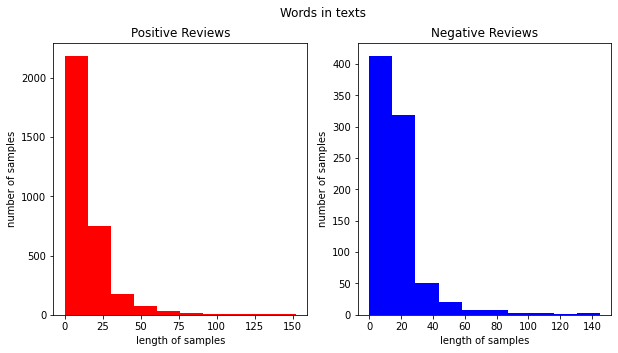

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['token'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['token'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['token'].values
y_train = train_data['label'].values
X_test= test_data['token'].values
y_test = test_data['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 11314
등장 빈도가 1번 이하인 희귀 단어의 수: 6380
단어 집합에서 희귀 단어의 비율: 56.39031288668905
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 11.180624923330354


In [ ]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)
#vocab_size = total_cnt
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4936
단어 집합의 크기 : 4936


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[146, 422, 47, 258, 178, 423, 65, 95, 799, 1, 159, 1, 5, 82, 1274, 584, 1, 36, 1, 1150, 628, 1692, 259, 14, 1, 1461, 865, 95, 3237, 300, 865, 461, 2511, 5, 36, 510, 2006, 1, 259, 82, 74, 1, 1, 1, 22, 5, 383, 55, 358, 284, 2007, 22, 5, 82, 301, 1, 22, 5, 36, 2512, 1, 1, 585, 301, 82, 8, 141, 44, 1, 3237, 3238, 1, 2512, 1, 1693, 3239, 3240, 1275, 18, 1, 7, 1, 800], [949, 40, 3241, 2008], [339, 3]]


리뷰의 최대 길이 : 152
리뷰의 평균 길이 : 13.975753122703894


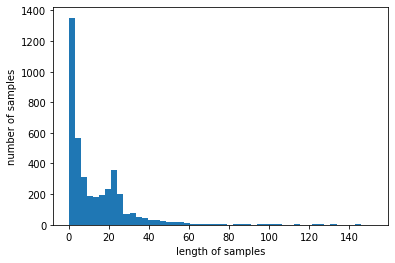

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 130
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 130 이하인 샘플의 비율: 99.82855743325986


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=1000, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/1000
13/13 [==============================] - 23s 1s/step - loss: 0.5400 - acc: 0.7985 - val_loss: 0.4915 - val_acc: 0.7931

Epoch 00001: val_acc improved from -inf to 0.79315, saving model to best_model.h5
Epoch 2/1000
13/13 [==============================] - 17s 1s/step - loss: 0.4681 - acc: 0.7985 - val_loss: 0.4604 - val_acc: 0.7931

Epoch 00002: val_acc did not improve from 0.79315
Epoch 3/1000
13/13 [==============================] - 16s 1s/step - loss: 0.4058 - acc: 0.8209 - val_loss: 0.4862 - val_acc: 0.8115

Epoch 00003: val_acc improved from 0.79315 to 0.81151, saving model to best_model.h5
Epoch 4/1000
13/13 [==============================] - 16s 1s/step - loss: 0.3334 - acc: 0.8806 - val_loss: 0.4164 - val_acc: 0.8311

Epoch 00004: val_acc improved from 0.81151 to 0.83109, saving model to best_model.h5
Epoch 5/1000
13/13 [==============================] - 16s 1s/step - loss: 0.2611 - acc: 0.9066 - val_loss: 0.4061 - val_acc: 0.8531

Epoch 00005: val_acc improved fro

In [ ]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

43/43 [==============================] - 3s 51ms/step - loss: 0.3711 - acc: 0.8560
테스트 정확도: 0.8560


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  #new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))